# Descripción del dataset:

4327 pares de audios únicos, acompañados por una calificación de naturalidad del habla, en una escala tipo likert del 1 al 5.
+ Los audios provienen de 50 sistemas distintos, en su gran mayoría, sistemas de TTS.
+ Los sistemas tienen distintos dialectos y generos de hablante
+ Los participantes, completaron una encuesta sociodemográfica, que incluye información sobre su edad, género, nivel de familiaridad con las voces sintetizadas, país/provincia de residencia, idioma nativo, y si tienen alguna discapacidad auditiva.
+ Cada participante evaluó 40 audios, en promedio, cada uno de un sistema distinto.

# Análisis exploratorio de datos:

Se comienza cargando los datos, las columnas se corresponden con las distintas variables que se mencionaron en la descripción del dataset.

+ **participant_id**: identificador del participante
+ **age**: edad del participante
+ **gender_participant**: género del participante
+ **country**: país de residencia del participante
+ **province**: provincia de residencia del participante
+ **education**: nivel de familiaridad con voces sintetizadas del participante
+ **headphone_brand**: marca de auriculares utilizada por el participante
+ **stimuli**: identificador del audio
+ **score**: calificación de naturalidad del habla
+ **stimuli_group**: sistema utilizado para generar el audio (nombre corto)
+ **stimuli_service**: sistema utilizado para generar el audio (nombre largo)
+ **dialect**: dialecto de voz del estimulo
+ **mos_pred**: predicción de la naturalidad del audio realizada por NISQA_TTS_v1

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
import seaborn as sns

In [47]:
subjective_results = pd.read_csv('subjective_results_corrected.csv')

subjective_results.head()

,participant_id,age,gender_participant,country,province,education,headphone_brand,stimuli,score,stimuli_group,stimuli_service,gender_stimuli,dialect,mos_pred,model
0,ymxfxn696we9rp1tnnub3f,26,P,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.201412,NISQA_TTS_v1
1,ymxfxn696we9rp1tnnub3f,26,P,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.755947,NISQA_TTS_v1
2,9fig36z1cml41m265ckifw,25,M,AR,Buenos Aires,4,Sony,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.338622,NISQA_TTS_v1
3,vj735xlt2yj805wyn5rimq,59,F,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,F,ARG,4.223487,NISQA_TTS_v1
4,vj735xlt2yj805wyn5rimq,59,F,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,F,ARG,3.404321,NISQA_TTS_v1


### Se calculan la distribución de los datos sociodemograficos de los participantes:

In [48]:
# compute the amount of unique participant_id in the participant_id column

unique_participant_id = subjective_results['participant_id'].nunique()
print('The amount of unique participant_id is:', unique_participant_id)

The amount of unique participant_id is: 92


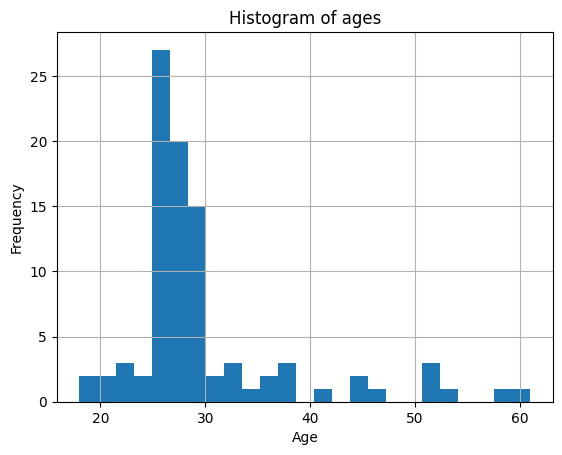

Average age:  29.945652173913043
Standard deviation of age:  8.246696482028335
Median age:  27.0
Minimum age:  18.0
Maximum age:  61.0


In [87]:
# subjective_results["age"] average and histogram
# just count the ages of unique participants, not all the rows
participant_ages = subjective_results.groupby("participant_id")["age"].mean()
participant_ages = participant_ages.dropna()


plt.hist(participant_ages, bins='auto')
plt.grid(True)
plt.title('Histogram of ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Average age: ", participant_ages.mean())
print("Standard deviation of age: ", participant_ages.std())
print("Median age: ", participant_ages.median())
print("Minimum age: ", participant_ages.min())
print("Maximum age: ", participant_ages.max())

In [82]:
participant_ages.describe()

count    92.000000
mean     29.945652
std       8.246696
min      18.000000
25%      26.000000
50%      27.000000
75%      30.000000
max      61.000000
Name: age, dtype: float64

In [50]:
# gender distribution. Just count the gender of unique participants, not all the rows

gender_distribution = subjective_results.groupby("participant_id")["gender_participant"].first().value_counts()
print(gender_distribution)

gender_participant
M    64
F    25
X     2
P     1
Name: count, dtype: int64


In [51]:
# province distribution. Just count the provinces of unique participants, not all the rows

province_distribution = subjective_results.groupby("participant_id")["province"].first().value_counts()
print(province_distribution)

province
Buenos Aires                       41
Ciudad Autónoma de Buenos Aires    37
Río Negro                           2
Chubut                              2
Tierra del Fuego                    1
Chaco                               1
Neuqu�n                             1
Jujuy                               1
Misiones                            1
Neuquén                             1
La Pampa                            1
Name: count, dtype: int64


In [67]:
# education distribution. Just count the education of unique participants, not all the rows

education_distribution = subjective_results.groupby("participant_id")["education"].first().value_counts()
#print, ordering by education level
print(education_distribution.sort_index())

average_eduaction = subjective_results.groupby("participant_id")["education"].first().mean()
print("Average education: ", average_eduaction)
print("Standard deviation of education: ", subjective_results.groupby("participant_id")["education"].first().std())

education
1    12
2    26
3    21
4    17
5    16
Name: count, dtype: int64
Average education:  2.989130434782609
Standard deviation of education:  1.30505833491269


### Distribución de los scores de naturalidad del habla:

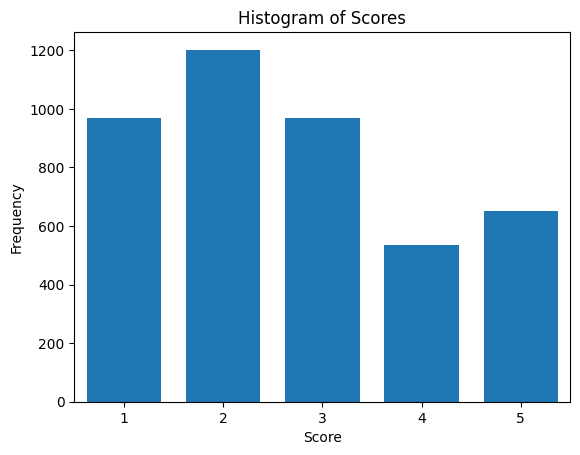

Shapiro-Wilk Test: Statistics=0.885, p=0.000
D’Agostino’s K^2 Test: Statistics=1136.162, p=0.000
Sample does not look Gaussian (reject H0) - Shapiro-Wilk Test
Sample does not look Gaussian (reject H0) - D’Agostino’s K^2 Test


In [69]:
# Extract scores
scores = subjective_results['score']

# Visual Inspection
plt.hist(scores, bins='auto')
plt.title('Histogram of Scores')
# set x-axis label 1-5
plt.xlabel('Score')
# set y-axis label
plt.ylabel('Frequency')
# set x ticks 1-5
plt.xticks(np.arange(1, 6, 1))
# set width of bars
plt.xlim(0.5, 5.5)
# set width of histogram bars to 1.5
plt.bar(np.arange(1, 6, 1), np.histogram(scores, bins=5)[0], width=0.75 )

plt.show()

# Statistical Tests
# Shapiro-Wilk Test
stat, p_shapiro = shapiro(scores)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p_shapiro))

# D’Agostino’s K^2 Test
stat, p_dagostino = normaltest(scores)
print('D’Agostino’s K^2 Test: Statistics=%.3f, p=%.3f' % (stat, p_dagostino))

# Step 6: Interpretation
alpha = 0.05
if p_shapiro > alpha:
    print('Sample looks Gaussian (fail to reject H0) - Shapiro-Wilk Test')
else:
    print('Sample does not look Gaussian (reject H0) - Shapiro-Wilk Test')

if p_dagostino > alpha:
    print('Sample looks Gaussian (fail to reject H0) - D’Agostino’s K^2 Test')
else:
    print('Sample does not look Gaussian (reject H0) - D’Agostino’s K^2 Test')

### Descripción de los estimulos:

In [88]:
# gender_stiumuli distribution, grouped by stimuli_service

gender_stimuli_distribution = subjective_results.groupby(["stimuli_service", "gender_stimuli"])["stimuli"].count()
# print(gender_stimuli_distribution)

# count amount of F and M in gender_stimuli_distribution
gender_stimuli_count = gender_stimuli_distribution.groupby('gender_stimuli').size()
print(gender_stimuli_count)


gender_stimuli
F    27
M    26
Name: stimuli, dtype: int64


In [78]:
# dialects distribution, just count unique stimuli_service

dialects_distribution = subjective_results.groupby("stimuli_service")["dialect"].first().value_counts()
print(dialects_distribution)

dialect
ARG      23
ES        9
ES-US     7
CAST      5
MEX       5
BO        3
-         1
Name: count, dtype: int64


### Agrupación de los estimulos por sistema y calculo de estadisticos descriptivos:

In [81]:
# Group by "stimuli_service" and calculate the statistics
scores_by_system = subjective_results.groupby("stimuli_service")["score"].describe()[["mean", "std", "25%", "50%", "75%"]]

# Print the statistics
print(scores_by_system)


                              mean       std   25%  50%   75%
stimuli_service                                              
DC_TTS_Camila_Godoy       1.890756  1.015055  1.00  2.0  2.50
DC_TTS_Celeste_Arretche   2.388889  1.166778  2.00  2.0  3.00
DC_TTS_LucasDiaz          2.610526  1.222961  2.00  2.0  3.50
DC_TTS_MaxSignorini       2.818182  1.167748  2.00  3.0  3.50
DC_TTS_Miguel_Grassi      2.000000  1.264911  1.00  1.5  2.75
DC_TTS_NaomiBent          1.938776  1.110552  1.00  2.0  2.00
DC_TTS_SanMig             1.700000  1.251666  1.00  1.0  2.00
Fastpitch_MultiSpeaker    1.762376  1.147340  1.00  1.0  2.00
Fastpitch_ar              2.721212  0.997484  2.00  3.0  3.00
Fastpitch_esp             2.551515  0.920008  2.00  2.0  3.00
Fastpitch_esp2            2.769697  0.928047  2.00  3.0  3.00
Loquendo_f                1.744898  0.722413  1.00  2.0  2.00
PollyN_Fiona              2.532609  0.857431  2.00  3.0  3.00
PollyN_Pedro              2.781609  1.050197  2.00  3.0  3.50
Polly_En

### Conclusiones iniciales del análisis exploratorio:

+ la distribución de los scores de naturalidad no sigue una distribución normal 
+ la mayoría de los participantes son de género masculino
+ la mayoría de los participantes tienen entre 25 y 30 años
+ 

# Regresión logística ordinal:

## Supuestos:
1. La variable dependiente está ordenada.
2. Una o más de las variables independientes son continuas, categóricas u ordinales.
3. No hay multicolinealidad.
4. Probabilidades proporcionales.

Los primeros dos supuestos se cumplen sin necesidad de realizar ninguna prueba.

In [123]:
subjective_results = pd.read_csv('subjective_results_corrected.csv')

In [ ]:
# # Replace gender_participant values with corresponding numerical values
# # assign one encoding 
# subjective_results['gender_participant'].replace({'F': [1, 0, 0, 0], 'M': [0, 1, 0, 0], 'X': [0, 0, 1, 0], 'P': [0, 0, 0, 1]}, inplace=True)
# subjective_results['gender_stimuli'].replace({'F': [1, 0], 'M': [0, 1]}, inplace=True)
# #replace stimuli_group values with corresponding numerical values A1 = 0, A2 = 1... B1 = 10, B2 = 11... C1 = 20, C2 = 21
# subjective_results['stimuli_group'].replace({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'A7': 6, 'A8': 7, 'A9': 8, 'A10': 9, 'B1': 10, 'B2': 11, 'B3': 12, 'B4': 13, 'B5': 14, 'B6': 15, 'B7': 16, 'B8': 17, 'B9': 18, 'B10': 19, 'C1': 20, 'C2': 21, 'C3': 22, 'C4': 23, 'C5': 24, 'C6': 25, 'C7': 26, 'C8': 27, 'C9': 28, 'C10': 29, 'D1': 30, 'D2': 31, 'D3': 32, 'D4': 33, 'D5': 34, 'D6': 35, 'D7': 36, 'D8': 37, 'D9': 38, 'D10': 39, 'E1': 40, 'E2': 41, 'E3': 42, 'E4': 43, 'E5': 44, 'E6': 45, 'E7': 46, 'E8': 47, 'E9': 48, 'E10': 49}, inplace=True)
# subjective_results['dialect'].replace({'ARG' : [1, 0, 0, 0, 0, 0, 0], 'ES': [0, 1, 0, 0, 0, 0, 0], 'ES-US': [0, 0, 1, 0, 0, 0, 0], 'CAST': [0, 0, 0, 1, 0, 0, 0], 'MEX': [0, 0, 0, 0, 1, 0, 0], 'BO': [0, 0, 0, 0, 0, 1, 0], '-': [0, 0, 0, 0, 0, 0, 1]}, inplace=True)
# subjective_results.head()

In [125]:
# Label Encoding
# Replace gender_participant values with corresponding numerical values
subjective_results['gender_participant'].replace({'F': 0, 'M': 1, 'X': 2, 'P': 3}, inplace=True)
subjective_results['gender_stimuli'].replace({'F': 0, 'M': 1}, inplace=True)
#replace stimuli_group values with corresponding numerical values A1 = 0, A2 = 1... B1 = 10, B2 = 11... C1 = 20, C2 = 21
subjective_results['stimuli_group'].replace({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'A7': 6, 'A8': 7, 'A9': 8, 'A10': 9, 'B1': 10, 'B2': 11, 'B3': 12, 'B4': 13, 'B5': 14, 'B6': 15, 'B7': 16, 'B8': 17, 'B9': 18, 'B10': 19, 'C1': 20, 'C2': 21, 'C3': 22, 'C4': 23, 'C5': 24, 'C6': 25, 'C7': 26, 'C8': 27, 'C9': 28, 'C10': 29, 'D1': 30, 'D2': 31, 'D3': 32, 'D4': 33, 'D5': 34, 'D6': 35, 'D7': 36, 'D8': 37, 'D9': 38, 'D10': 39, 'E1': 40, 'E2': 41, 'E3': 42, 'E4': 43, 'E5': 44, 'E6': 45, 'E7': 46, 'E8': 47, 'E9': 48, 'E10': 49}, inplace=True)
subjective_results['dialect'].replace({'ARG' : 0, 'ES': 1, 'ES-US': 2, 'CAST': 3, 'MEX': 4, 'BO': 5, '-': 6}, inplace=True)
subjective_results.head()



,participant_id,age,gender_participant,country,province,education,headphone_brand,stimuli,score,stimuli_group,stimuli_service,gender_stimuli,dialect,mos_pred,model
0,ymxfxn696we9rp1tnnub3f,26,3,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,41,open_srl_es_ar_female_2,0,0,4.201412,NISQA_TTS_v1
1,ymxfxn696we9rp1tnnub3f,26,3,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,41,open_srl_es_ar_female_2,0,0,4.755947,NISQA_TTS_v1
2,9fig36z1cml41m265ckifw,25,1,AR,Buenos Aires,4,Sony,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,41,open_srl_es_ar_female_2,0,0,4.338622,NISQA_TTS_v1
3,vj735xlt2yj805wyn5rimq,59,0,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,41,open_srl_es_ar_female_2,0,0,4.223487,NISQA_TTS_v1
4,vj735xlt2yj805wyn5rimq,59,0,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,41,open_srl_es_ar_female_2,0,0,3.404321,NISQA_TTS_v1


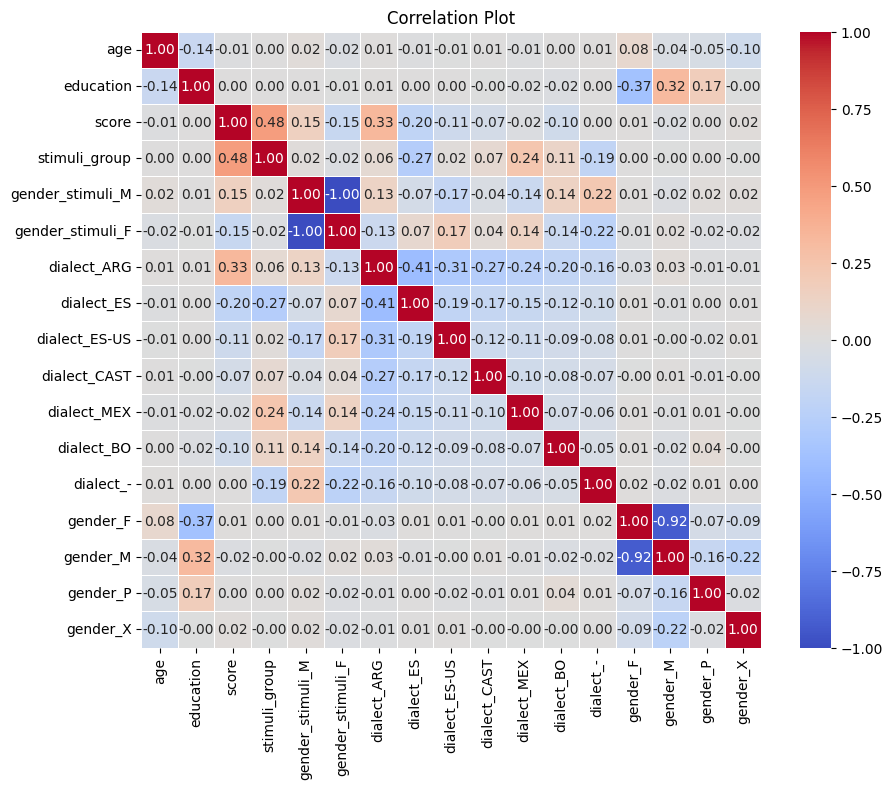

In [120]:
# Select relevant columns
selected_columns = ['age', 'education', 'score','stimuli_group', 'gender_stimuli_M', 'gender_stimuli_F', 'dialect_ARG', 'dialect_ES', 'dialect_ES-US', 'dialect_CAST', 'dialect_MEX', 'dialect_BO', 'dialect_-', 'gender_F', 'gender_M', 'gender_P', 'gender_X']

# Create a subset dataframe with selected columns
subset_df = subjective_results[selected_columns]

# Convert categorical variables to numerical values if needed
# For example, you can use Label Encoding or One-Hot Encoding

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot')
plt.show()


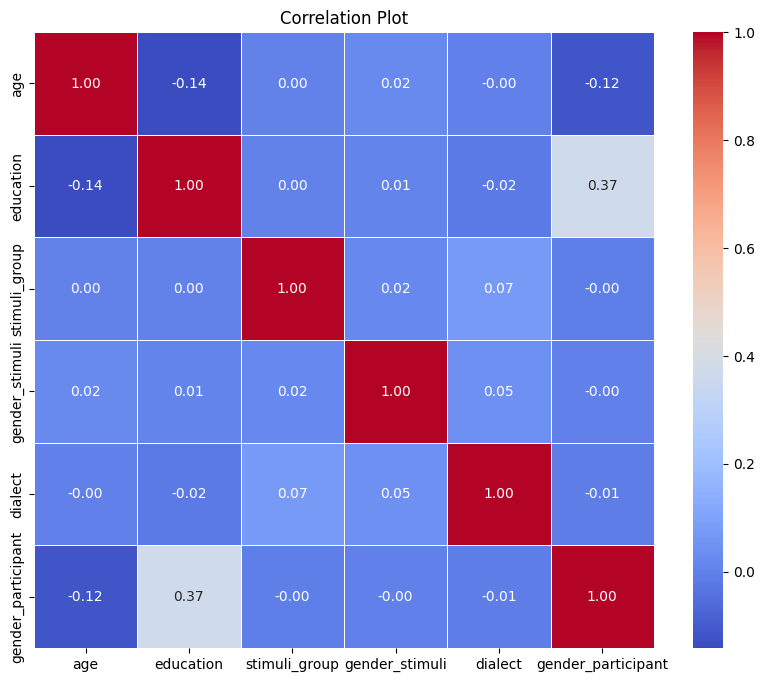

In [131]:
# Select relevant columns
selected_columns = ['age', 'education','stimuli_group', 'gender_stimuli','dialect', 'gender_participant']

# Create a subset dataframe with selected columns
subset_df = subjective_results[selected_columns]

# Convert categorical variables to numerical values if needed
# For example, you can use Label Encoding or One-Hot Encoding

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot')
plt.show()


### Utilizamos VIF para evaluar la multicolinealidad:

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select relevant columns
selected_columns = ['age', 'gender_participant', 'education', 'stimuli_group', 'gender_stimuli', 'score', 'dialect']

# Create a subset dataframe with selected columns
subset_df = subjective_results[selected_columns]

# Convert categorical variables to numerical values if needed
# For example, you can use Label Encoding or One-Hot Encoding

# Calculate the VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = subset_df.columns
vif_data["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

# Display the VIF values
print(vif_data)


             Variable       VIF
0                 age  6.378189
1  gender_participant  3.408712
2           education  6.027721
3       stimuli_group  4.929271
4      gender_stimuli  1.866447
5               score  6.649178
6             dialect  1.849156


## Evaluar proporcionalidad de probabilidades con la prueba de Brant:

In [132]:
### COMPLETAR


# Regresión logística ordinal

dependent variable **SCORE** is categorical and ordered

## Hypothesis
Since the outcome variable is categorized and ranked, we can perform an Ordinal Logistic Regression analysis on the dataset. We set the alpha = 0.05 and the hypothesis as follows:

+ H0: there is no statistically significant factors between the variables that influence the Happiness Score
+ H1: there is at least one statistically significant factor between the variables that influence the Happiness Score

In [133]:
subjective_results = pd.read_csv('subjective_results_corrected.csv')
subjective_results.head()

,participant_id,age,gender_participant,country,province,education,headphone_brand,stimuli,score,stimuli_group,stimuli_service,gender_stimuli,dialect,mos_pred,model
0,ymxfxn696we9rp1tnnub3f,26,P,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.201412,NISQA_TTS_v1
1,ymxfxn696we9rp1tnnub3f,26,P,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.755947,NISQA_TTS_v1
2,9fig36z1cml41m265ckifw,25,M,AR,Buenos Aires,4,Sony,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,F,ARG,4.338622,NISQA_TTS_v1
3,vj735xlt2yj805wyn5rimq,59,F,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,F,ARG,4.223487,NISQA_TTS_v1
4,vj735xlt2yj805wyn5rimq,59,F,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,F,ARG,3.404321,NISQA_TTS_v1


In [134]:
subjective_results = pd.get_dummies(subjective_results, columns=['dialect'], prefix='dialect')
subjective_results = pd.get_dummies(subjective_results, columns=["gender_participant"], prefix='gender_participant')
subjective_results = pd.get_dummies(subjective_results, columns=["gender_stimuli"], prefix='gender_stimuli')
subjective_results.head()

,participant_id,age,country,province,education,headphone_brand,stimuli,score,stimuli_group,stimuli_service,...,dialect_CAST,dialect_ES,dialect_ES-US,dialect_MEX,gender_participant_F,gender_participant_M,gender_participant_P,gender_participant_X,gender_stimuli_F,gender_stimuli_M
0,ymxfxn696we9rp1tnnub3f,26,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,...,False,False,False,False,False,False,True,False,True,False
1,ymxfxn696we9rp1tnnub3f,26,AR,Buenos Aires,5,samsung,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,...,False,False,False,False,False,False,True,False,True,False
2,9fig36z1cml41m265ckifw,25,AR,Buenos Aires,4,Sony,/home/udesa_ubuntu/tesis/frontend/public/asset...,5.0,E2,open_srl_es_ar_female_2,...,False,False,False,False,False,True,False,False,True,False
3,vj735xlt2yj805wyn5rimq,59,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,...,False,False,False,False,True,False,False,False,True,False
4,vj735xlt2yj805wyn5rimq,59,AR,Buenos Aires,2,NaN,/home/udesa_ubuntu/tesis/frontend/public/asset...,4.0,E2,open_srl_es_ar_female_2,...,False,False,False,False,True,False,False,False,True,False
